In [7]:
#: imports, nada que ver
import random
from collections import defaultdict, namedtuple
from itertools import product, starmap

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import Image, YouTubeVideo
from scipy import stats
%matplotlib inline
sns.set()
states_colors = matplotlib.colors.ListedColormap(
    ['#9A9A9A', '#D886BA', '#4D314A', '#6E9183'])
cmap_default = 'Blues'
cpal_default = sns.color_palette(("Blues_d"))

sns.set_style("white")
sns.set_context("poster")
random.seed(1)

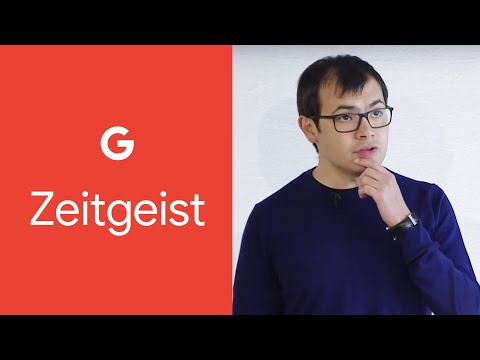

In [2]:
YouTubeVideo("rbsqaJwpu6A")

*A Theory of Everything* fue el título de una charla impartida por Demis Hassabis, neurocientífico y cofundador de DeepMind. DeepMind es un think tank de Inteligencia Artificial, que fue adquirido por Google en 2014.
Hassabis explicó que solo había dos campos científicos por los que se sentía atraído. El primero es la física, obviamente, que se ocupa de las cuestiones más fundamentales que uno pueda imaginar. La mayoría de las cuestiones que preocupan a la física, como el origen del universo o la naturaleza del tiempo, parecen tener un alcance mucho mayor que la existencia fugaz de la raza humana o incluso toda la vida biológica en su conjunto.
Entonces, ¿por qué neurociencia? A primera vista, la neurociencia parece estar ligada a la vida biológica y todo lo que trata la neurociencia parece tener una vida muy corta en comparación con las preguntas universales de la física.

Demis Hassabis afirmó que todo lo que percibimos o razonamos está ligado a nuestra mente y cada pregunta que hacemos o respondemos no podría existir sin nuestra mente.

Entonces, la comprensión de la naturaleza de la inteligencia o tal vez incluso ser capaz de crear inteligencia es esencial para comprender básicamente todo lo demás.

Para algunos, el impacto que los próximos avances en IA tendrán en nuestra vida cotidiana será incluso mayor que los cambios causados ​​por la ubicuidad de las computadoras surgidas en el siglo pasado.

Comprender los conceptos básicos de la IA o el aprendizaje por refuerzo también podría tratarse de preservar la soberanía y la autonomía en un mundo moldeado cada vez más por el auge de las tecnologías de IA.

Para mí, es fascinante que los principios detrás de resultados deslumbrantes como DeepMind [control de nivel humano a través de Deep Reinforcement Learning] (https://deepmind.com/research/dqn/) no sean tan diferentes del agente que atraviesa el pequeño mundo en forma de cuadrícula de 4x12 cuadrados construido en el resto de este cuaderno.

Y es aún más emocionante que incluso los resultados más recientes de un grupo de expertos de 500 millones de dólares como DeepMind puedan ser implementados y reconstruidos por cualquier persona en todo el mundo que esté dispuesta a invertir un poco de tiempo.
Creo que esto es exclusivo del campo de la IA. Sería impensable que alguien pudiera reproducir los resultados recientes en química o física experimental por su cuenta en casa

## Un mundo en cuadrados 4x12 

Para echar un vistazo más de cerca a RL, el problema modelo de un [gridworld](https://webdocs.cs.ualberta.ca/~sutton/book/ebook/node65.html) está tomado de Sutton y Barto, dos pioneros de RL.
Aquí hay una trama de este gridworld:
![cliffworld](cliffworldmap.png)
El mundo con el que tiene que lidiar el agente consta de solo 4 $\times$ 12 cuadrados, que representan todos sus **estados** posibles. La mecánica de este mundo está definida por un pequeño número de reglas:

1. El agente comienza cada episodio en el cuadrado verde de la esquina superior izquierda.
2. En cada paso de tiempo, el agente puede moverse un paso.
3. El agente no puede abandonar el tablero.
4. Hay dos formas en que un episodio puede terminar:
    1. El agente alcanza el estado meta
    2. El agente pisa uno de los cuadrados rosas. Si es así, se cae por un precipicio.
5. Vivir significa sufrir. Así cada paso de tiempo el agente recibe una recompensa negativa de **-1**. Si el agente cae por el precipicio recibe una penalización de **-100**

Entonces, el ciclo básico de cada interacción del entorno del agente es:

```
while episode is non terminal: 
       agent chooses action
       environment changes state
       agent observes new state and receives reward for new state
       REPEAT
       
```
El objetivo de RL es encontrar la secuencia de acción que maximiza el rendimiento esperado a lo largo del tiempo.

Tan simple como puede ser este modelo, contiene todos los componentes básicos necesarios para describir una amplia gama de problemas diferentes además de un entorno de modelo en forma de cuadrícula.
Al ser un marco que ayuda a formalizar problemas en lugar de un conjunto de métodos distintos, a veces se trata más de plantear problemas para resolverlos de la manera correcta que de un conjunto particular de métodos.

Entonces, ¿de qué se trata Gridworld?

Debido a que la vida es cruel, no hay mucho que ganar en este pequeño mundo cuadriculado. Cada paso que da el agente significa dolor, por lo que el agente quiere terminar un episodio lo más rápido posible. Lo único peor que dar paso tras paso sin encontrar la manera de escapar de este sufrimiento es pisar una de las losetas del acantilado, lo que significa caer por un acantilado y resulta en un doloroso castigo de *-100* y la terminación de la corriente. episodio.
Entonces, en este mundo modelo, maximizar la recompensa (minimizar la recompensa negativa) significa encontrar el camino más corto desde el estado inicial hasta la meta en la esquina superior derecha sin caer por los acantilados.

Pero, por supuesto, el agente aún no sabe nada de esto.

A continuación, se crea este pequeño mundo reticular. Básicamente, este dominio tiene solo dos responsabilidades:
    
    1. Recibir la acción del agente y cambiar su estado en respuesta.
    2. Calcular la señal de recompensa para un estado.
    
Otros métodos son solo para registrar estados, asegurarse de que el agente no haga ningún movimiento imposible y verificar si un episodio terminó o aún se está ejecutando.

La siguiente celda contiene los parámetros más importantes del cliffworld:

In [8]:
State = namedtuple('State', ['m', 'n'])

all_states = [State(0, 0), State(0, 1), State(0, 2), State(0, 3), State(0, 4),
              State(0, 5), State(0, 6), State(0, 7), State(0, 8), State(0, 9),
              State(0, 10), State(0, 11), State(1, 0), State(1, 1),
              State(1, 2), State(1, 3), State(1, 4), State(1, 5), State(1, 6),
              State(1, 7), State(1, 8), State(1, 9), State(1, 10),
              State(1, 11), State(2, 0), State(2, 1), State(2, 2), State(2, 3),
              State(2, 4), State(2, 5), State(2, 6), State(2, 7), State(2, 8),
              State(2, 9), State(2, 10), State(2, 11), State(3, 0),
              State(3, 1), State(3, 2), State(3, 3), State(3, 4), State(3, 5),
              State(3, 6), State(3, 7), State(3, 8), State(3, 9), State(3, 10),
              State(3, 11)]

cliff_states = all_states[1:11]
goal_state = State(m=0, n=11)
start_state = State(m=0, n=0)

terminal = cliff_states + [goal_state]
dflt_reward = -1
cliff_reward = -100

moves = {'>': State(0, 1),
         'v': State(1, 0),
         '<': State(0, -1),
         '^': State(-1, 0)}

parameters = {'all_states': all_states,
              'cliff_states': cliff_states,
              'goal_state': goal_state,
              'start_state': start_state,
              'terminal': terminal,
              'dflt_reward': dflt_reward,
              'cliff_reward': cliff_reward,
              'moves': moves}

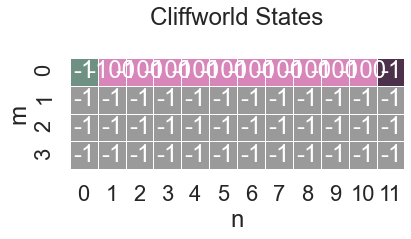

In [21]:
rewards = np.full((4,12), -1, dtype='int64')
color = np.zeros((4,12))
for x in all_states:
    if x == start_state:
        rewards[x] = -1
        color[x] = 4
    if x == goal_state:
        rewards[x] = -1
        color[x] = 2
    if x in cliff_states:
        rewards[x] = -100
        color[x] = 1

ax = sns.heatmap(color, cmap=states_colors, annot=rewards, cbar=False, square=True, linewidths=1, fmt='' )
ax.set_title('Cliffworld States\n')
ax.set(ylabel='m', xlabel='n')

plt.show();

In [22]:
class CliffWorld:
    """Cliffworld domain for RL.

    A simple domain with 4 x 12 = 48 possible discrete states.
    Originally from Sutton and Barto:
    http://webdocs.cs.ualberta.ca/~sutton/book/ebook/node65.html

    Args:

    Specified in the dictionary above because this class is not
    intended for use outside this notebook.


    """

    def __init__(self, *initial_data, **kwargs):
        for dictionary in initial_data:
            for key in dictionary:
                setattr(self, key, dictionary[key])
        for key in kwargs:
            setattr(self, key, kwargs[key])
        self.record_list = []
        self.position = [self.start_state]
        self.log_dict = {}
        self.reward_sum = 0

    def newstate(self, state, action):
        """Computes the newstate.

        Takes a state and an action from the agent and computes its next position.

        Args:
            state: a tuple (m, n)  representing the coordinates of the current state
            action: index of an action

        Returns:
            newstate: a tuple (m, n) representing the coordinates of the new position

        """
        move = moves[action]
        newstate = State(state.m + move.m, state.n + move.n)
        self.position.append(newstate)
        return newstate

    def reward(self, state):
        """Computes the reward signal for a given state.

        Takes a state and checks if it's a cliff or just a normal state.

        Args:
            state: a named tuple (m, n) 
                representing the coordinates of the current state.

        Returns:
            reward: a scalar value. -100 for a cliff state, -1 otherwise.

        """
        if state in self.cliff_states:
            reward = self.cliff_reward
        else:
            reward = self.dflt_reward
        self.reward_sum += reward
        return reward

    def is_terminal(self, state):
        """Checks if state is terminal.

        If the agent reached its goal or fell off a cliff the episode ends.
        Otherwise it will continue.

        Args:
            state: namedtuple, State(m, n), representing position.

        Returns:
            True if state is terminal, False otherwise.

        """
        if state in self.terminal:
            self.log_stuff(state)
            return True
        else:
            return False

    def log_stuff(self, state):
        """Log things for analysis.

        You can safely ignore this.
        I will refactor this as a mixin or use a decorator instead later.

        """
        self.position.append(state)
        self.log_dict['visited_states'] = self.position[:]
        self.log_dict['reward'] = self.reward_sum
        self.record_list.append(self.log_dict)
        self.log_dict = {}
        self.position = [self.start_state]
        self.log_dict = {}
        self.reward_sum = 0
        pass

    def valid_actions(self, state):
        """Compute valid actions for given state.

        It's unimportant for understanding RL. Just ignore.

        """

        valid_actions = []
        if (state.m + moves['>'].m, state.n + moves['>'].n) in self.all_states:
            valid_actions.append('>')
        if (state.m + moves['v'].m, state.n + moves['v'].n) in self.all_states:
            valid_actions.append('v')
        if (state.m + moves['<'].m, state.n + moves['<'].n) in self.all_states:
            valid_actions.append('<')
        if (state.m + moves['^'].m, state.n + moves['^'].n) in self.all_states:
            valid_actions.append('^')
        return valid_actions

Una buena manera de entender cómo interactúan el entorno y el agente es escribir un agente simple que elija acciones al azar. Aunque el agente no aprenda nada en absoluto, la interfaz con el entorno será la misma para el siguiente agente de Q-learning.

El agente necesita solo 2 métodos. Uno elige y ejecuta una acción en el entorno, el otro aprende de la recompensa que sigue a esta acción y del nuevo estado resultante. Por supuesto, el método de aprendizaje del agente aleatorio no hace nada en absoluto.

In [23]:
class RandomAgent:
    """Just choosing actions at random. Learns nothing.

    We write this for the purpose of understanding the interface between
    agent and domain we later use for the real RL-agent.

    """

    def __init__(self):
        self.reward_sum = 0
        pass

    def act(self, state, valid_actions):
        """Take state and valid actions for that state. Return  action."""
        action = random.choice(valid_actions)
        return action

    def learn(self, state, action, newstate, reward):
        """Never learns anything. Basically like the AFD."""
        self.reward_sum += reward
        pass

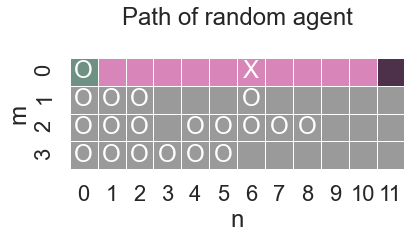

In [71]:
#: Just some agent randomly roaming through a 
#: gridlike domain with 4x12 discrete states.
#: Occasionally jumping off cliffs.
#: Hey, it's still a better lovestory than Twilight.

random_agent = RandomAgent()    #: Instantiate an agent object
domain = CliffWorld(parameters) #: Create our small world

def run_episode(domain, agent):
    state = domain.start_state
    while not domain.is_terminal(state):
        valid_actions = domain.valid_actions(state) #: Get a list of allowed moves for the current state.
        action = agent.act(state, valid_actions)    #: Take the current state as input and compute an action.
        newstate = domain.newstate(state, action)   #: Take the action and compute the changed state.
        reward = domain.reward(newstate)            #: Compute reward.
        agent.learn(state, action, newstate, reward)#: Learn.
        state = newstate                            #: Newstate becomes the current state for next iteration.
    pass

run_episode(domain, random_agent)

agent_position_log = domain.record_list[-1]['visited_states']

agent_path = np.empty((4, 12), dtype=str)

for state_visited in agent_position_log:
    if state_visited in terminal:
        agent_path[state_visited] = 'X'
    else:
        agent_path[state_visited] = 'O'

ax = plt.axes()
ax.set_title('Path of random agent\n')
figure = sns.heatmap(color,
                     annot = agent_path,
                     fmt = '',
                     ax=ax,
                     cbar=False,
                     linewidth = 1,
                     cmap = states_colors,
                     square=True)
figure.set(xlabel='n', ylabel='m')
plt.show()

Claramente, actuar al azar no lleva al agente muy lejos o, peor aún, tarde o temprano muere al caer por un acantilado cuando pisa uno de los mosaicos rosas que representan estados terminales.
Así que tiene que haber otra manera.

No solo el aprendizaje por refuerzo, sino también el aprendizaje en general utiliza solo dos principios principales (o combinaciones de los mismos).

#### Métodos basados ​​en modelos

Aprender un modelo significa utilizar la experiencia para estimar la mecánica real de un entorno. Esto significa poder planificar, conocer las posibles consecuencias de una decisión antes de ejecutarla.

Una ventaja importante de este enfoque es que su uso de los datos/experiencia disponibles es muy eficiente. El mayor inconveniente es que la planificación en general es computacionalmente bastante costosa.
Los enfoques basados ​​en modelos podrían ser favorables para aplicaciones como la robótica, donde es difícil recopilar grandes cantidades de datos, pero la lentitud de las acciones del robot deja suficiente tiempo para que los cálculos necesarios utilicen el modelo para planificar una secuencia de acciones y sus consecuencias.

#### Métodos basados ​​en valores

El enfoque explorado a continuación es fundamentalmente diferente del uso de un modelo. El aprendizaje basado en valores significa usar la experiencia para estimar una función que asigna un valor a cada par de acción de estado posible y le dice al alumno qué tan bueno es este emparejamiento en términos de maximizar el retorno de recompensas a largo plazo. Aunque los modelos posteriores de aprendizaje biológico (como el trabajo de [Rescola y Wagner] (http://www.scholarpedia.org/article/Rescorla-Wagner_model)) están aún más cerca de los algoritmos basados ​​en valores que se usan hoy en día, incluso el condicionamiento clásico, descubierto por primera vez por Ivan Pavlov en su famoso [experimento con perros](https://en.wikipedia.org/wiki/Ivan_Pavlov) donde un perro comienza a relacionar un estímulo condicionado (el sonido de una campana) con un siguiente estímulo incondicionado (comida) es sorprendentemente similar al algoritmo Q-learning implementado a continuación.

## El concepto de una función de valor

El objetivo es encontrar una secuencia de acciones que maximice el rendimiento esperado de las recompensas en el gridworld.
Entonces, tal vez sea suficiente aprender de la experiencia cuán "bueno" es tomar alguna acción en un estado particular.
Si es posible aprender una función que exprese esto asignando un valor a cada par de acciones de estado, es posible simplemente tomar la acción de mayor valor en cada estado y finalmente encontrar la meta.

¿Pero cómo?

Por cada acción el agente recibe una recompensa. A veces hay un descuento en esta recompensa, por lo que esa recompensa en el siguiente paso es favorable a una recompensa en un futuro lejano.
En el paso de tiempo $t$, el retorno $G_t$ es la suma de todas las recompensas futuras a partir de ese paso de tiempo.

$$G_{t} = r_{t+1}+r_{t+2}+r_{t+3}+... +r_{n}$$

En el caso de descuento, las recompensas se multiplican con algo de $\gamma<0$ elevado a la potencia de la cantidad de pasos de tiempo que esta recompensa está lejos de la próxima recompensa. Entonces, si una recompensa es de $k$ pasos de tiempo, se descuenta $\gamma^{k-1}$:

$$ G_{t} = r_{t+1}+ \gamma r_{t+2}+ \gamma^2 r_{t+3}+ \dots = \sum_{k=0}^{\infty}\ gama^k r_{t+k+1} $$

Como el futuro es desconocido, el retorno tiene que expresarse de otra manera. Es posible entender la rentabilidad como la suma de sólo dos partes:

$$G_{t}= r_{t+1} + \gamma G_{t+1}$$

El retorno en el paso de tiempo $t$ es la recompensa inmediata en el siguiente paso de tiempo $r_{t+1}$ más el retorno descontado a partir de este paso de tiempo.

Esto se puede usar para introducir una función, $Q(s,a)$ , que asigna algún valor a cada acción posible en cada estado que le dice al agente qué tan buena es esta acción en términos de maximizar el retorno $G_{t}$ .

La función Q se puede dividir de la misma manera que el retorno $G_{t}$. El valor máximo por realizar alguna acción $a$ en el estado $t$ es la suma de la recompensa por realizar esa acción y el valor máximo (descontado) por realizar la acción óptima en el siguiente paso de tiempo.

$$Q(s_t,a_t)= r_{t+1} + \gamma max_{a_{t+1}} Q(s_{t+1}, a_{t+1})$$

El agente tiene que aprender $Q(s, a)$ que mapea todos los pares de acción de estado a un valor que tiene que ser lo más cercano posible al valor *verdadero* de un par de acción de estado. Si se conoce una buena estimación de los verdaderos valores Q, el agente solo tiene que realizar la acción de mayor valor en cada estado.
Esto lleva a la regla de aprendizaje del algoritmo Q-learning (el uso de letras mayúsculas indica valores tabulares reales):

$$Q(S_{t}A_{t})\leftarrow Q(S_{t}A_{t})+\alpha[R_{t+1}+\gamma \max_{A}Q(S_{t+ 1},A)-Q(S_{t},A_{t})]$$

El agente tiene una estimación del valor de realizar la acción $A_t$ en el estado $S_t$. Ahora ejecuta esta acción y recibe la recompensa $R_{t+1}$ a cambio. Y debido a la definición anterior, $Q(s_t,a_t)$ se puede actualizar con la nueva información. La dirección de la actualización está determinada por la recompensa inmediata que recibe el agente más la diferencia (descontada) entre el máximo de la estimación $Q(S_{t+1})$ del estado que ahora alcanzamos multiplicado por algún parámetro de tamaño de paso pequeño $ \alpha$.

Una simple intuición para esto:

Porque el valor de un par de acciones estados $Q(S_t,A_t)$ se puede estimar como la recompensa $R_{t+1}$ por realizar esa acción más el valor estimado $Q(S_{t+1},A_{ t+1})$ por realizar la mejor acción en el siguiente intervalo de tiempo, podemos actualizar nuestra estimación de $Q(S_t,A_t)$ cuando recibamos la recompensa real $R_{t+1}$ en el siguiente intervalo de tiempo .

Si cree que necesitará 60 minutos para ir de su casa a su lugar de trabajo pero se encuentra en un embotellamiento después de 10 minutos, ya sabe que llegará tarde y puede llamar a su jefe antes de llegar.
Cuanto más se acerque a su lugar de trabajo, menores serán las actualizaciones de su llegada estimada.
Si estás en el primer piso pero notas que el ascensor no funciona ese día, tener que subir las escaleras ya no cambia el tiempo estimado para el camino de casa al trabajo.

Esta parte también se llama $[R_{t+1}+\gamma \max_{a}Q(S_{t+1},a)-Q(S_{t},A_{t})]$ o temporal error de diferencia
En realidad, este error de TD también podría llamarse *sorpresa*. Es una expresión de la diferencia entre una experiencia real y la expectativa que precede a esta experiencia. La intuición de que la cantidad de sorpresa y aprendizaje están estrechamente relacionados es de hecho congruente con algunos resultados de [investigación] neurocientífica (http://link.springer.com/article/10.3758/BF03196058).

Actualizar las expectativas por la diferencia con la experiencia real da como resultado el siguiente algoritmo:

```
initialize values Q[states, actions] arbitrarily (as zero)
begin at start state S
    while episode non terminal:
        execute action A with highest Q
        observe reward R' and newstate S'
        Q[S, A] = Q[S', A']+ alpha * [R'+ gamma max_a[Q[S', A'] - Q[S, A]]
        S = S'
        
```

Debido a que el agente aún no sabe nada, todos los valores Q se inicializan como cero. Para cliffworld, esto podría ser una matriz con el tamaño $posible\, estados \times acciones$. Para gridworld, la matriz consistiría en $(4 \times 12) \times 4$ mosaicos porque el agente puede ir *izquierda*, *derecha*, *arriba* o *abajo*.
A menudo, el número de estados posibles no se conoce de antemano, por lo que el *defaultdict* de Python tecleado por una tupla anidada en la forma (acción (índice de fila, índice de columna)) podría usarse en lugar de una matriz. Siempre que no haya un valor existente para una tecla de estado/acción, el diccionario devuelve 0.

Hay una cosa más que debe saber y es la selección de acciones $\epsilon-greedy$.
Si alguien explota solo el conocimiento que ya posee y nunca intenta nada nuevo, tampoco podrá descubrir o *aprender* nada nuevo.
Entonces el agente selecciona sus acciones $\epsilon-greedy$: En una proporción de $1-\epsilon$ veces, no selecciona la acción con el valor más alto y simplemente elige una al azar. El valor de $\epsilon$ disminuye con el tiempo a medida que crece la experiencia.

Creo que a menudo no sería una mala idea si todos **aumentáramos** nuestro $\epsilon$ personal y nos atreviéramos a probar algo nuevo de vez en cuando (:


La manifestación python del agente Q-learning:

In [72]:
class QAgent:
    """Q-Learning agent.

    A value based, off-policy RL-agent.
    Uses defaultdict to return 0 for unknown state/action pairs.
    This has the same purpose as initializing all unknown states to zero.


    Args:
        epsilon: Parameter for epsilon-greedy action selection.
        epsilon_modifier: scalar value between 0 and 1,
        decay factor for epsilon
        alpha: Learning rate or stepsize. Usually <<1
        gamma: discount of future rewards <=1

    Attrs:
        Q: Python defaultdict with defaultvalue 0 containing
        the Q-values for state action pairs.
        Keyed by a nested state action tuple.
        Example:
        {
            (State(m=0, n=0), '>'): -99.94360791266038,
            (State(m=0, n=0), 'v'): -1.1111111111107184,
            (State(m=1, n=0), '>'): -1.111111111107987,
            (State(m=1, n=0), 'v'): -1.1111111111079839,
            (State(m=1, n=0), '^'): -1.111111111108079
        }
        A: Defaultdict keyed by state tuple, values
        are keys of executed actions. Is used to determine
        whether an action in a state took place in the past.
        If there's no memory len(A[state]) == 0


    """

    def __init__(self, alpha, epsilon, gamma):
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.Q = defaultdict(int)
        self.A = defaultdict(set)
        self.td_list = []

    def act(self, state, valid_actions):
        """Choose action.

        Take state tuple and valid actions and choose action.
        Action can either be random or greedy to ensure exploration.
        Probability of selecting random actions depends on epsilon.
        Smaller epsilon means less randomness.

        Args:
            state: state tuple (n,m) describes current position.
            valid_actions: list of indices of valid actions for a state.

        Returns:
            action: Index of selected action.
            Can either be chosen at random or greedily.

        """
        if random.random() > self.epsilon:
            action = self.act_greedy(state, valid_actions)
        else:
            action = self.act_random(valid_actions)
        return action

    def learn(self, state, action, newstate, reward):
        """Compute update of Q-function.

        Update Q-values when reaching new state and receiving reward.
        New value equals to the old value + the computed td-error times
        the stepsize parameter alpha.
        Also adds the executed action to A, to keep track of all state
        action pairs.


        Args:
            state: namedtuple (m, n) the state of the last timestep.
            action: index of executed action at the last timestep.
            newstate: current state reached after executing action.
            reward: scalar value received for reaching newstate.


        Returns:
            pass

        """
        self.Q[state, action] = (self.Q[state, action] + self.alpha *
                                 (self.td(state, action, newstate, reward)))
        self.A[state].add(action)
        pass

    def act_random(self, valid_actions):
        """Choose index of action from valid actions at random.

        Called either if epsilon greedy policy returns random
        or if there's no previous knowledge of action values for
        a state.

        Args:
            valid: List of indices of valid actions for a state.

        Returns:
            action: Index of selected action.
                Can either be chosen at random or greedy.

        """
        random_action = random.choice(valid_actions)
        return random_action

    def act_greedy(self, state, valid_actions):
        """Choose action with the highest Q-value.

        First checks whether the agent previously has executed any actions at all
        in the current state. If not it calls the random act_random method.

        Args:
            valid_actions: List of indices of valid actions for a state.
            state: namedtuple, State(n, m),
                representing coordinates of the current state.

        Returns:
            chosen_action: Index of selected action.
                Can either be chosen at random or greedy.

        """
        if len(self.A[state]) == 0:
            chosen_action = self.act_random(valid_actions)
        else:
            q_s = {actions: self.Q[state, actions]
                   for actions in self.A[state]}
            chosen_action = max(q_s, key=q_s.get)
        return chosen_action

    def td(self, state, action, newstate, reward):
        """Compute td error to update value dict

        First checks wether the agent previously as executed any actions at all in
        the current state. If not the maximum Q-value for that state defaults to 0.
        It fetches Q-values for all previously exectued actions in newstate tracked in A.
        Next computes the key of the largest Q-value and queris the fetches Q-values.
        Finally computes the td error for the learning update.

        Args:
            state: state of the last timestep.
            action: index of selected action in that state
            newstate: state the agent just reached.
            reward: scalar value

        Returns:
            td: td error. You know, cocaine, baby.

        """
        if len(self.A[newstate]) == 0:
            max_qval = 0
        else:
            q_vals = {actions: self.Q[newstate, actions]
                      for actions in self.A[newstate]}
            max_qval_key = max(q_vals, key=q_vals.get)
            max_qval = q_vals[max_qval_key]
        td = reward + self.gamma * max_qval - self.Q[state, action]
        self.td_list.append(td)
        return td

Lo único que falta para probar finalmente nuestro Q-Agent es una función para realizar múltiples episodios. A medida que el agente avanza, la cantidad de exploración al actuar aleatoriamente se reduce gradualmente en cada episodio modificando épsilon con un parámetro de caída. Para fines de evaluación en el último episodio, el agente explota la función de valor aprendido sin ninguna exploración.

In [73]:
def run_experiment(domain, agent, epsilon_decay, n_episodes):
    for i in range(n_episodes):
        agent.epsilon *= epsilon_decay
        run_episode(domain, agent)
    print('Setting epsilon paramter to zero',
          'to prevent random actions and evaluate learned policy.\n')
    agent.epsilon = 0
    run_episode(domain, agent)
    last_reward = domain.record_list[-1]['reward']
    print('Trained for {0} episodes.\n' 
          '\nGained reward of {1} points in the last episode.'.format(n_episodes, last_reward))                       
    pass


In [150]:
epsilon = 0.5
epsilon_decay = 0.99
gamma = 0.5
alpha = 0.25
n_episodes = 500

In [151]:
q_agent = QAgent(alpha, epsilon, gamma)
domain = CliffWorld(parameters)

In [152]:
run_experiment(domain, q_agent, epsilon_decay, n_episodes)

logged_data = domain.record_list
Q_table = q_agent.Q
A_table = q_agent.A
td = q_agent.td_list

Setting epsilon paramter to zero to prevent random actions and evaluate learned policy.

Trained for 500 episodes.

Gained reward of -13 points in the last episode.


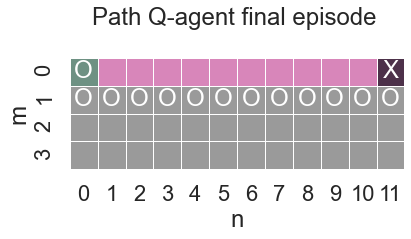

In [153]:
agent_position_log = domain.record_list[-1]['visited_states']

agent_path = np.empty((4, 12), dtype=str)

for state_visited in agent_position_log:
    if state_visited in terminal:
        agent_path[state_visited] = 'X'
    else:
        agent_path[state_visited] = 'O'

ax = plt.axes()
ax.set_title('Path Q-agent final episode \n')
figure = sns.heatmap(color,
                     annot=agent_path,
                     fmt='',
                     ax=ax,
                     cbar=False,
                     linewidth=1,
                     cmap=states_colors,
                     square=True)
figure.set(xlabel='n', ylabel='m')
plt.show()

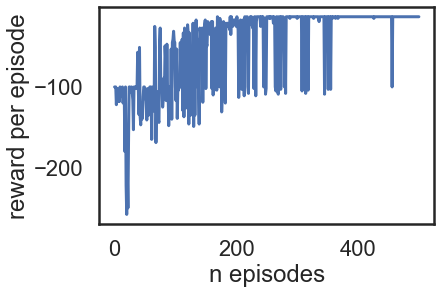

In [157]:

points = [i['reward'] for i in logged_data]
figure = sns.lineplot(x = range(n_episodes+1), y = points)
figure.set(xlabel='n episodes', ylabel='reward per episode');

In [155]:
points

[-100,
 -100,
 -100,
 -122,
 -102,
 -108,
 -118,
 -110,
 -118,
 -100,
 -107,
 -112,
 -109,
 -100,
 -120,
 -106,
 -112,
 -180,
 -100,
 -222,
 -258,
 -207,
 -250,
 -166,
 -100,
 -100,
 -106,
 -102,
 -100,
 -107,
 -116,
 -153,
 -100,
 -100,
 -100,
 -102,
 -100,
 -100,
 -57,
 -101,
 -134,
 -51,
 -136,
 -147,
 -122,
 -140,
 -135,
 -112,
 -100,
 -100,
 -104,
 -114,
 -117,
 -141,
 -102,
 -135,
 -135,
 -103,
 -100,
 -100,
 -100,
 -165,
 -102,
 -100,
 -118,
 -130,
 -25,
 -51,
 -169,
 -112,
 -125,
 -106,
 -141,
 -144,
 -45,
 -27,
 -100,
 -104,
 -100,
 -125,
 -116,
 -89,
 -104,
 -49,
 -67,
 -117,
 -47,
 -100,
 -106,
 -148,
 -100,
 -117,
 -129,
 -53,
 -140,
 -45,
 -41,
 -31,
 -43,
 -45,
 -100,
 -117,
 -53,
 -139,
 -100,
 -104,
 -100,
 -100,
 -45,
 -100,
 -69,
 -41,
 -129,
 -33,
 -137,
 -27,
 -43,
 -102,
 -126,
 -49,
 -23,
 -33,
 -146,
 -33,
 -100,
 -135,
 -51,
 -124,
 -100,
 -21,
 -149,
 -33,
 -135,
 -39,
 -17,
 -47,
 -100,
 -41,
 -104,
 -146,
 -27,
 -31,
 -45,
 -31,
 -27,
 -119,
 -37,
 -31,
 -23,

In [159]:
232/700

0.3314285714285714

In [160]:
700*0.82

574.0

In [164]:
574-232

342

In [163]:
231/700

0.33